<a href="https://colab.research.google.com/github/chenweioh/Observational-Data-Analysis-R/blob/main/Assisting_Public_Sector_Decision_Makers_With_Policy_Analysis_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assisting Public Sector Decision Makers With Policy Analysis - Assignment 1 by Oh Chen Wei

## NYC Hourly Traffic Analysis
This repository showcases how to use R to analyze NYC hourly traffic data. The dataset provides detailed information on traffic flow at major intersections in New York City, enabling us to perform meaningful analyses and derive insights for better decision-making.


---
### Dataset Overview
The dataset contains hourly traffic data with the following columns:

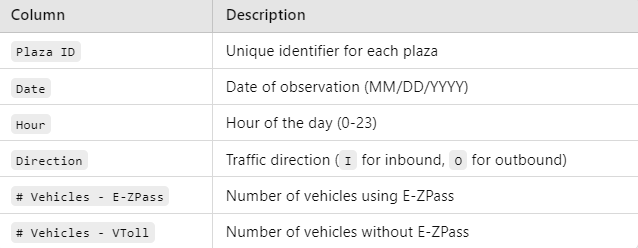

### The goal of this analysis is to demonstrate:

* Data Wrangling: How to clean and prepare the dataset for analysis.
* Statistical Analysis: Use R to perform hypothesis testing, such as comparing daily vehicle volumes across years.
* Visualization: Showcase the potential for visualizing traffic patterns.


## Steps to Use the R Environment in Colab
* Start a new Colab notebook.
* Set the runtime type to R by selecting Runtime > Change runtime type > R.

### R Code for Loading Dataset from URL



In [12]:
# Install required packages
if (!require(readr)) install.packages('readr')
if (!require(dplyr)) install.packages('dplyr')

# Load necessary libraries
library(readr)
library(dplyr)

# Define the dataset URL
dataset_url <- "https://d3c33hcgiwev3.cloudfront.net/tHeagveeReO0SbuplJkh8A_145c37419b844f419dbcd28f22ee15f1_NYC-hourly-traffic.csv?Expires=1733270400&Signature=Z9yHrvbdzP2tLZutL32NrL8ObTih0cPFpVupj06aUAc2nkxem6h21F9h0x-pFNfzZs7hyozGu-wbX4Ap-fsi3kQ35C3I5og2dH0cBK3Rskzq9AQyQ3Zz-lUzi9F6q4uUOcziL~fhknD1PrkvC0WPqP9eElRZN-IaTiLn2fbEUYU_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A"

# Load the dataset directly from the URL
traffic_data <- read_csv(dataset_url)

# Display the first few rows of the data
head(traffic_data)

# Check the structure of the dataset
str(traffic_data)

# Data Cleaning: Extract the year and month from the date column
traffic_data <- traffic_data %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),  # Ensure Date is properly formatted
    Year = as.integer(format(Date, "%Y")),      # Extract year
    Month = as.integer(format(Date, "%m")),
    Day = as.integer(format(Date, "%d"))# Extract month
  )

# Display the cleaned data
head(traffic_data)




Rows: 1936276 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date, Direction
dbl (4): Plaza ID, Hour, # Vehicles - E-ZPass, # Vehicles - VToll

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
21,08/06/2022,0,I,2820,649
21,08/06/2022,1,I,2124,474
21,08/06/2022,2,I,1617,391
21,08/06/2022,3,I,1228,358
21,08/06/2022,4,I,1604,368
21,08/06/2022,5,I,1987,385


spc_tbl_ [1,936,276 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Plaza ID            : num [1:1936276] 21 21 21 21 21 21 21 21 21 21 ...
 $ Date                : chr [1:1936276] "08/06/2022" "08/06/2022" "08/06/2022" "08/06/2022" ...
 $ Hour                : num [1:1936276] 0 1 2 3 4 5 6 7 8 9 ...
 $ Direction           : chr [1:1936276] "I" "I" "I" "I" ...
 $ # Vehicles - E-ZPass: num [1:1936276] 2820 2124 1617 1228 1604 ...
 $ # Vehicles - VToll  : num [1:1936276] 649 474 391 358 368 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Plaza ID` = col_double(),
  ..   Date = col_character(),
  ..   Hour = col_double(),
  ..   Direction = col_character(),
  ..   `# Vehicles - E-ZPass` = col_double(),
  ..   `# Vehicles - VToll` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Year,Month,Day
<dbl>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>
21,2022-08-06,0,I,2820,649,2022,8,6
21,2022-08-06,1,I,2124,474,2022,8,6
21,2022-08-06,2,I,1617,391,2022,8,6
21,2022-08-06,3,I,1228,358,2022,8,6
21,2022-08-06,4,I,1604,368,2022,8,6
21,2022-08-06,5,I,1987,385,2022,8,6


What is the t-test value, of the comparison of the March daily average volume of cars for the following years 2018 and 2020.

### Explanation of Steps
* Filter for March: Use filter(Month == 3) to retain rows where Month is 3 (March).

* Group by Year and Day: Use group_by(Year, Day) to aggregate data at the daily level within March.

* Calculate Daily Average: In summarise(), compute the daily average of vehicle volumes by summing # Vehicles - E-ZPass and # Vehicles - VToll.

* T-Test: Use t.test() to compare Daily_Avg for 2018 and 2020.
Subset
```
df_daily$Daily_Avg
```
for each year using
```
df_daily$Year == 2018 and df_daily$Year == 2020
```



* Output:

The t.test() function provides the t-statistic, p-value, confidence interval, and means for both groups.###

In [14]:
# Group by Year, Month, and Day to calculate daily averages
df_daily <- traffic_data %>%
  filter(Month == 3) %>%  # Filter for March
  group_by(Year, Day) %>%  # Group by Year and Day
  summarise(
    Daily_Avg = mean(`# Vehicles - E-ZPass` + `# Vehicles - VToll`, na.rm = TRUE),
    .groups = "drop"
  )

# Perform a t-test comparing 2018 and 2020
t_test_result <- t.test(
  df_daily$Daily_Avg[df_daily$Year == 2018],
  df_daily$Daily_Avg[df_daily$Year == 2020]
)

# Print the t-test result
t_test_result



	Welch Two Sample t-test

data:  df_daily$Daily_Avg[df_daily$Year == 2018] and df_daily$Daily_Avg[df_daily$Year == 2020]
t = 4.4669, df = 47.111, p-value = 4.952e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 267.7459 706.4807
sample estimates:
mean of x mean of y 
 1805.948  1318.835 


## R Code for Visualizing Traffic by Year and Direction


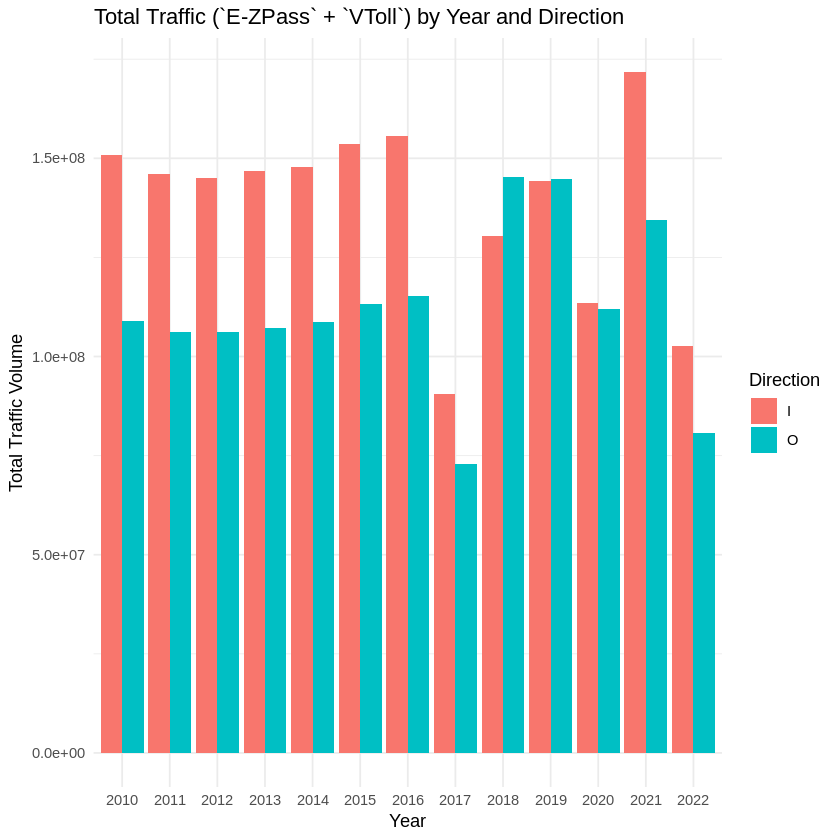

In [24]:
library(ggplot2)
library(dplyr)

# Aggregate the data by year and direction (inbound/outbound), summing traffic
traffic_summary <- traffic_data %>%
  group_by(Year, Direction) %>%
  summarize(
    total_traffic = sum(`# Vehicles - E-ZPass` + `# Vehicles - VToll`, na.rm = TRUE),
    .groups = "drop"
  )

# Visualize the traffic patterns
ggplot(traffic_summary, aes(x = factor(Year), y = total_traffic, fill = Direction)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Total Traffic (`E-ZPass` + `VToll`) by Year and Direction",
    x = "Year",
    y = "Total Traffic Volume",
    fill = "Direction"
  ) +
  theme_minimal()
